# Performance Comparison

In [1]:
import os
from google.colab import drive
drive.mount('/content/drive')
PROJECT_DIR = "/content/drive/MyDrive/bioproj01"
RESULTS_DIR = os.path.join(PROJECT_DIR, "results")
print(f"Results directory found: {PROJECT_DIR}\nContents: {os.listdir(PROJECT_DIR)}")

Mounted at /content/drive
Results directory found: /content/drive/MyDrive/bioproj01
Contents: ['data', 'results']


## Load Performance Result Files

In [12]:
import pandas as pd

svm_df = pd.read_csv(f"{RESULTS_DIR}/svm/svm_performance.csv")
cnn_df = pd.read_csv(f"{RESULTS_DIR}/cnn/cnn_performance.csv")
bert_df = pd.read_csv(f"{RESULTS_DIR}/dnabert2/dnabert2_performance.csv")

perf_df = pd.concat([svm_df, cnn_df, bert_df], ignore_index=True)
perf_df

,model,accuracy,f1,auroc,mcc,kmer_size,feature_dim,evaluation,input_length_bp,encoding,conv_layers,epochs,pretrained_model,sequence_length_bp
0,SVM_kmer,0.712678,0.712534,0.791516,0.425356,6.0,4096.0,80/20 holdout,NaN,NaN,NaN,NaN,NaN,NaN
1,CNN,0.757939,0.733480,0.845699,0.524723,NaN,NaN,80/20 holdout,400.0,one-hot,2.0,NaN,NaN,NaN
2,DNABERT2,0.816633,0.806144,0.895754,0.636918,NaN,NaN,80/20 holdout,NaN,NaN,NaN,3.0,dnabert2-no-flashattention,400.0


In [14]:
perf_table = perf_df[
    ["model", "accuracy", "f1", "auroc", "mcc"]
].copy()

perf_table

,model,accuracy,f1,auroc,mcc
0,SVM_kmer,0.712678,0.712534,0.791516,0.425356
1,CNN,0.757939,0.733480,0.845699,0.524723
2,DNABERT2,0.816633,0.806144,0.895754,0.636918


In [15]:
perf_table.to_csv(
    f"{RESULTS_DIR}/performance_summary.csv",
    index=False
)

## Performance Bar Chart

In [5]:
import matplotlib.pyplot as plt

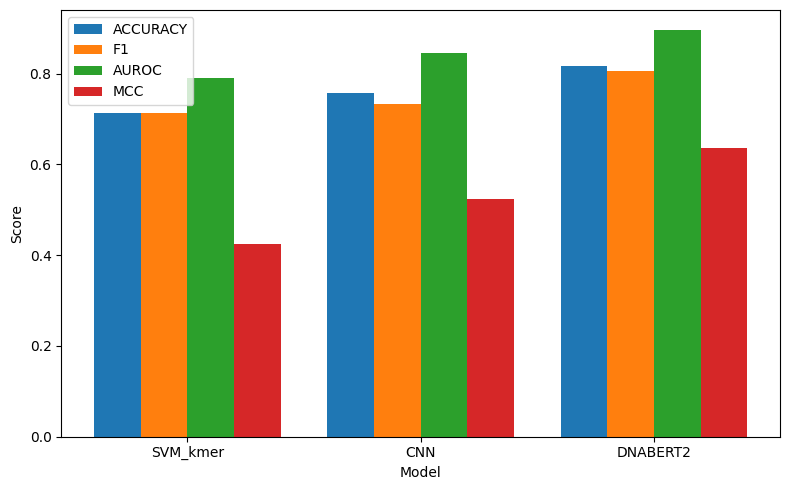

In [18]:
metrics = ["accuracy", "f1", "auroc", "mcc"]
models = perf_table["model"].values

x = range(len(models))

plt.figure(figsize=(8, 5))

bar_width = 0.2

for i, metric in enumerate(metrics):
    plt.bar(
        [p + i * bar_width for p in x],
        perf_table[metric],
        width=bar_width,
        label=metric.upper()
    )

plt.xticks([p + 1.5 * bar_width for p in x], models)
plt.ylabel("Score")
plt.xlabel("Model")
plt.legend()
plt.tight_layout()

bar_path = os.path.join(RESULTS_DIR, "performance_comparison.png")
plt.savefig(bar_path, dpi=300, bbox_inches="tight")
plt.show()

## ROC Curves

In [7]:
from sklearn.metrics import roc_curve, auc

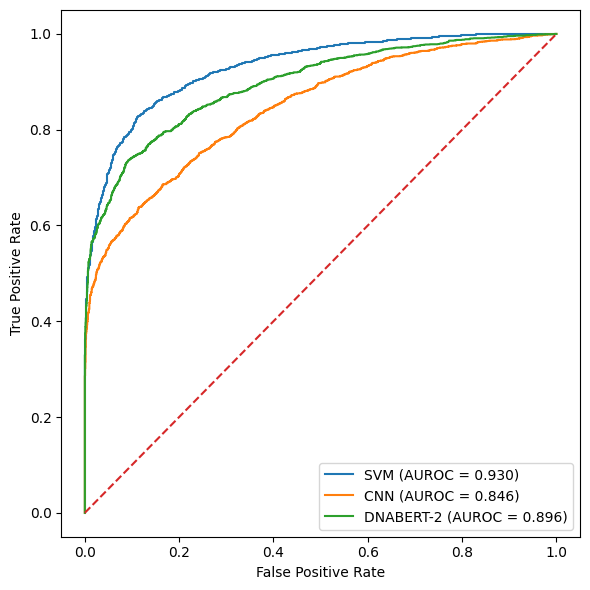

In [19]:
roc_files = {
    "SVM": f"{RESULTS_DIR}/svm/svm_roc_data.csv",
    "CNN": f"{RESULTS_DIR}/cnn/cnn_roc_data.csv",
    "DNABERT-2": f"{RESULTS_DIR}/dnabert2/dnabert2_roc_data.csv",
}
plt.figure(figsize=(6, 6))

for model_name, path in roc_files.items():
    roc_df = pd.read_csv(path)

    y_true = roc_df["y_true"].values
    y_score = roc_df["y_score"].values

    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)

    plt.plot(
        fpr,
        tpr,
        label=f"{model_name} (AUROC = {roc_auc:.3f})"
    )

plt.plot([0, 1], [0, 1], linestyle="--")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.tight_layout()

roc_path = os.path.join(RESULTS_DIR, "roc_curves.png")
plt.savefig(roc_path, dpi=300, bbox_inches="tight")
plt.show()